In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_excel("/content/drive/MyDrive/Internship/DS _Assignment_Part_1_dataset.xlsx")
train_df.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station(km),Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size(sqft),House_price_of_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
train_df.shape

(414, 9)

In [5]:
train_df.isnull().sum()

Transaction_date                           0
House_Age                                  0
Distance_from_nearest_Metro_station(km)    0
Number_of_convenience_stores               0
latitude                                   0
longitude                                  0
Number_of_bedrooms                         0
House_size(sqft)                           0
House_price_of_unit_area                   0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction_date                         414 non-null    float64
 1   House_Age                                414 non-null    float64
 2   Distance_from_nearest_Metro_station(km)  414 non-null    float64
 3   Number_of_convenience_stores             414 non-null    int64  
 4   latitude                                 414 non-null    float64
 5   longitude                                414 non-null    float64
 6   Number_of_bedrooms                       414 non-null    int64  
 7   House_size(sqft)                         414 non-null    int64  
 8   House_price_of_unit_area                 414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
train_df.House_price_of_unit_area

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: House_price_of_unit_area, Length: 414, dtype: float64

In [8]:
y = train_df.House_price_of_unit_area
x = train_df.drop('House_price_of_unit_area', axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.1)

In [10]:
train_df.shape

(414, 9)

In [11]:
x_test

,Transaction_date,House_Age,Distance_from_nearest_Metro_station(km),Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size(sqft)
155,2013.166667,13.8,4082.01500,0,24.94155,121.50381,2,1292
274,2013.166667,27.5,394.01730,7,24.97305,121.53994,1,544
377,2013.333333,3.9,49.66105,8,24.95836,121.53756,3,1325
200,2013.416667,17.4,995.75540,0,24.96305,121.54915,1,410
251,2012.916667,31.7,1159.45400,0,24.94960,121.53018,2,970
393,2013.000000,16.9,967.40000,4,24.98872,121.53408,1,413
54,2013.083333,16.1,289.32480,5,24.98203,121.54348,2,1193
214,2013.583333,18.1,1783.18000,3,24.96731,121.51486,1,586
281,2013.333333,4.7,387.77210,9,24.98118,121.53788,1,539
258,2013.416667,0.0,292.99780,6,24.97744,121.54458,2,1205


# **EDA**

In [12]:
target = 'House_price_of_unit_area'

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


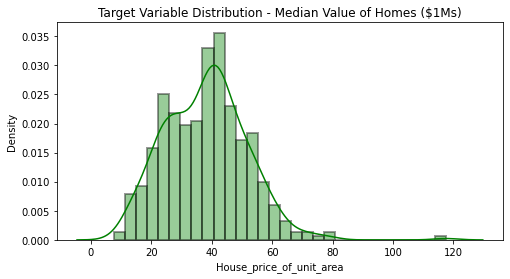

In [13]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(train_df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

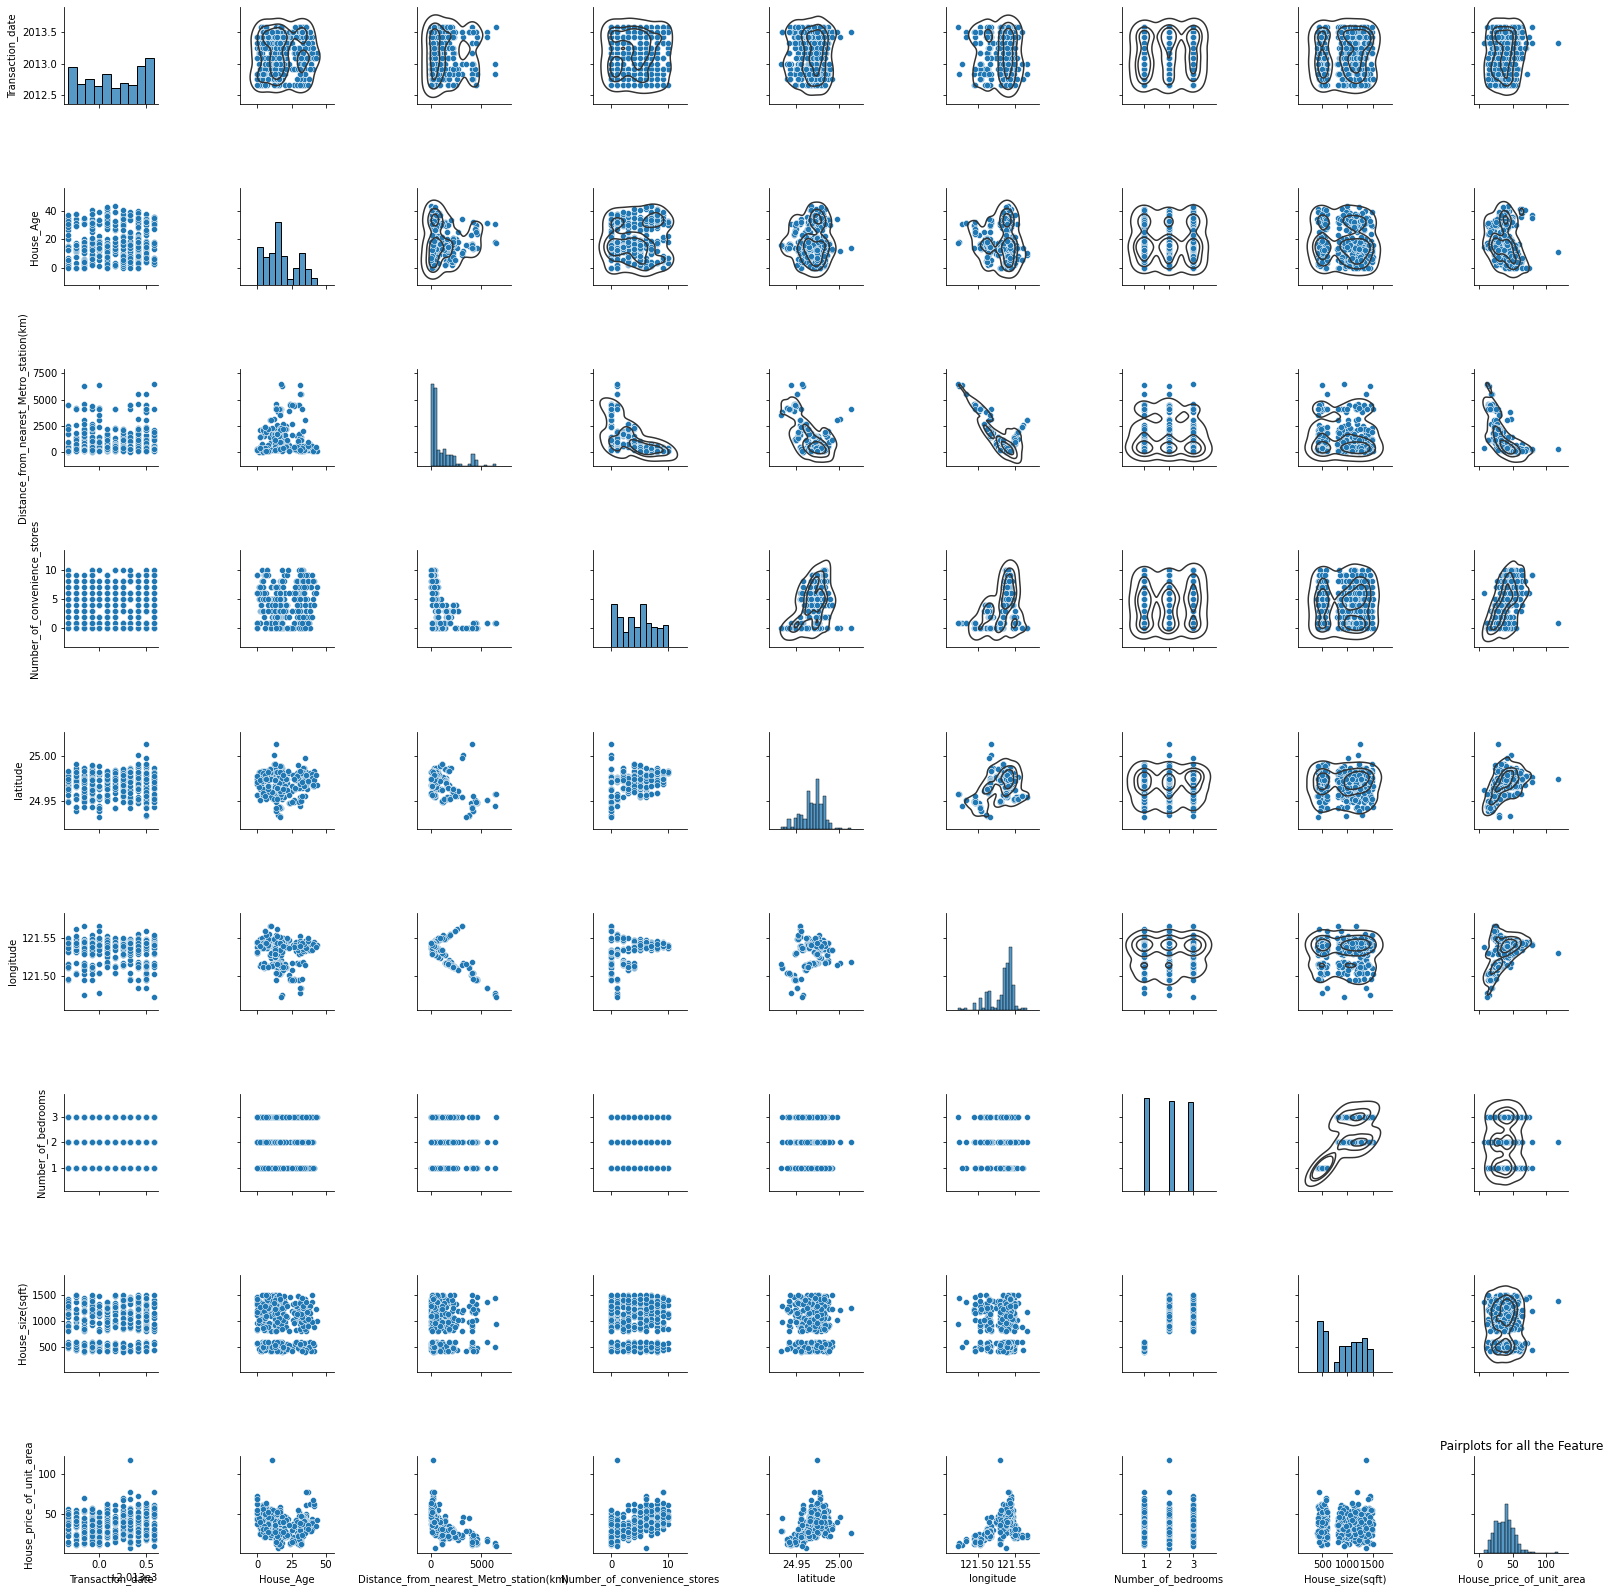

In [14]:
#Understanding the relationship between all the features

g = sns.pairplot(train_df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

                                       Correlation Matrix                                       


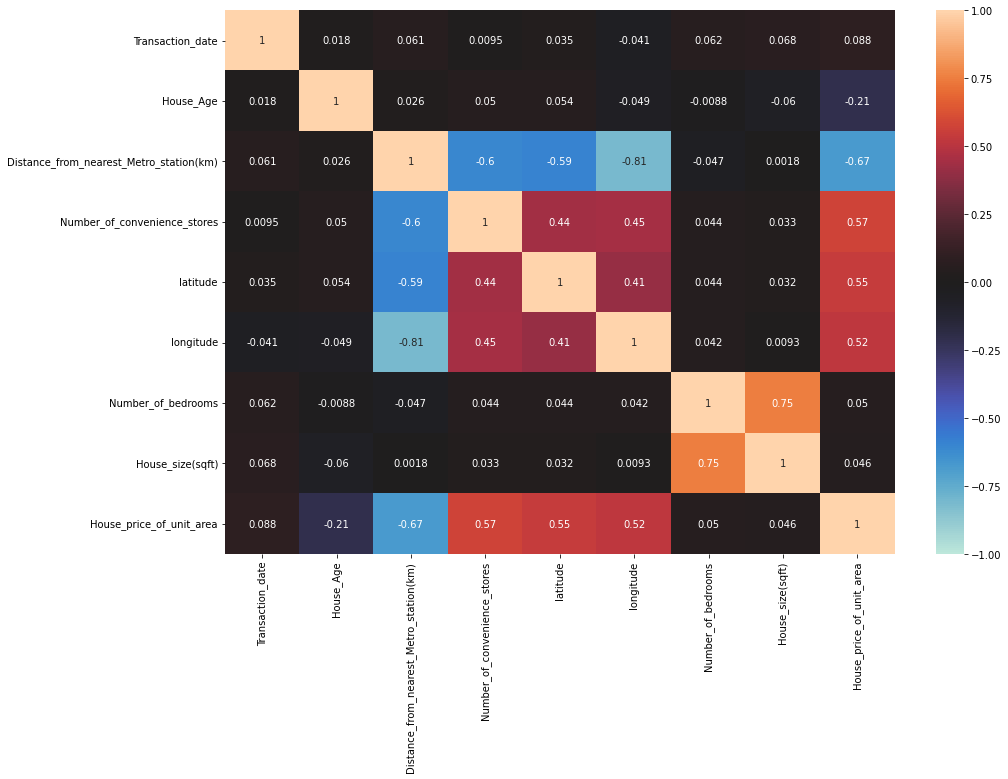

In [15]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[15,10])
sns.heatmap(train_df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

# **Decision Trees**

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score

In [67]:
tr_regressor = DecisionTreeRegressor(random_state = 60)
tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)
# pred_tr = tr_regressor.predict(X_test)
# decision_score=tr_regressor.score(X_test,y_test)
# expl_tr = explained_variance_score(pred_tr,y_test)

0.4957622088434619

In [13]:
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(x_train,y_train)
tr_regressor.score(x_test,y_test)

-0.12673029890970056

In [37]:
pred_tr = tr_regressor.predict(x_test)
decision_score=tr_regressor.score(x_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
expl_tr

0.26212765685840433

In [38]:
# clf_dt.score(x_test,y_test)

In [39]:
tr_regressor.predict(x_test)

array([37.9, 42.2, 41.2, 37.7, 30.9, 41.1, 37.5, 31.1, 50.2, 37.9, 48.1,
       27. , 46. , 42.5, 50.5, 27.3, 39.5, 33.1, 23. , 39.7, 31.6, 25. ,
       41.1, 62.9, 41.6, 54.8, 13.7, 42.2, 48.5, 40.9, 53.7, 32.1, 49.7,
       56.3, 59.5, 43.7, 27.3, 23. , 24.7, 19.1, 34.1, 21.8])

In [ ]:
y_pred = dt_model.predict(x_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

# **Ridge Regressor**

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter_space = {
    "alpha": [1, 10, 100, 290, 500],
    "fit_intercept": [True, False],
    "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

clf = GridSearchCV(Ridge(random_state=3), parameter_space, n_jobs=4,
                   cv=3, scoring="neg_mean_absolute_error")

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}


In [41]:
ridge_model = Ridge(random_state=3, **clf.best_params_)

In [42]:
ridge_model.fit(x_train, y_train)


Ridge(alpha=1, random_state=3, solver='cholesky')

In [43]:
ridge_model.score(x_test,y_test)

0.34415089786904585

In [50]:
rr_regressor = Ridge(alpha =290)
rr_regressor.fit(x_train,y_train)
rr_regressor.score(x_test,y_test)

0.2761667958708004

In [36]:
from sklearn.metrics import mean_absolute_error

y_pred = ridge_model.predict(x_test)
ridge_mae = mean_absolute_error(y_test, y_pred)
print("Ridge MAE =", ridge_mae)

Ridge MAE = 7.088965437725415


# **Elastic net** 

In [38]:
from sklearn.linear_model import ElasticNet

parameter_space = {
    "alpha": [1, 10, 100, 280, 500],
    "l1_ratio": [0.5, 1],
    "fit_intercept": [True, False],
}

clf = GridSearchCV(ElasticNet(random_state=3), parameter_space, 
                   n_jobs=4, cv=3, scoring="neg_mean_absolute_error")

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'alpha': 1, 'fit_intercept': False, 'l1_ratio': 0.5}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+04, tolerance: 6.052e+01
  model = cd_fast.enet_coordinate_descent(


In [40]:
elasticNet_model = ElasticNet(random_state=3, **clf.best_params_)
elasticNet_model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+04, tolerance: 6.052e+01
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1, fit_intercept=False, random_state=3)

In [41]:
elasticNet_model.score(x_test,y_test)

0.6433165298493331

In [ ]:
y_pred = elasticNet_model.predict(X_test)
elasticNet_mae = mean_absolute_error(y_test, y_pred)
print("Elastic Net MAE =", elasticNet_mae)

# **KNN**

In [42]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 50, 'weights': 'distance'}


In [44]:
knn_model = KNeighborsRegressor(**clf.best_params_)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, n_neighbors=50,
                    weights='distance')

In [45]:
knn_model.score(x_test,y_test)

0.7094156692899698

In [ ]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

# **RANSAC Regression**

In [52]:
from sklearn import linear_model

In [53]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train)

# Scoring the Ransac model

ransac_r2_score = r2_score(ransac.predict(x_test), y_test)
ransac_r2_score

0.42649454773960693

# **SVM**

In [ ]:
svr = SVR(C=1000, gamma = 0.1)
svr_RMSE = fit_and_evaluate(svr)
svr_RMSE

In [ ]:
def fit_and_evaluate (model):
    model.fit(X_train, Y_train.ravel())
    model_pred = model.predict(X_test)
    model_RMSE = RMSE(Y_train, model_pred)
    
    return model_RMSE

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": ["poly", "linear", "rbf", "sigmoid"],
        "degree": [3, 5],
        "coef0": [0, 3, 7],
        "gamma":[1e-3, 1e-1, 1/x_train.shape[1]],
        "C": [1, 10, 100],
    }

clf = GridSearchCV(SVR(), parameter_space, cv=3, n_jobs=4,
                   scoring="neg_mean_absolute_error")

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

KeyboardInterrupt: ignored

In [ ]:
svr_model = SVR(**clf.best_params_)
svr_model.fit(x_train, y_train)

In [ ]:
svr_model.score(x_test,y_test)

In [ ]:
y_pred = svr_model.predict(X_test)
svr_mae = mean_absolute_error(y_test, y_pred)
print("Support Vector Regression MAE =", svr_mae)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(x_train,y_train)
rf_regressor.score(x_test,y_test)

0.870564502865429

In [ ]:
prediction = rf_regressor.predict(x_test)
print(prediction)

[41.01166667 27.366      48.68466667 54.50966667 43.46966667 38.87366667
 24.136      38.758      47.66266667 49.55266667 39.74033333 47.96566667
 35.106      37.23566667 14.899      40.47866667 49.47766667 37.00733333
 15.455      42.848      52.277      46.856      48.51366667 29.91966667
 38.773      14.24466667 35.12733333 41.09966667 50.974      33.21966667
 39.05266667 37.37366667 44.92933333 45.276      38.892      38.78233333
 55.487      26.322      41.09333333 46.61833333 24.05033333 43.30133333]


In [ ]:
np.expm1(prediction)

array([6.47352049e+17, 7.67189750e+11, 1.39149640e+21, 4.71245747e+23,
       7.56199461e+18, 7.63165843e+16, 3.03481076e+10, 6.79806839e+16,
       5.00764030e+20, 3.31474174e+21, 1.81554691e+17, 6.77991664e+20,
       1.76336445e+15, 1.48335317e+16, 2.95497179e+06, 3.79893242e+17,
       3.07523006e+21, 1.18053986e+16, 5.15253717e+06, 4.06115870e+18,
       5.05373692e+22, 2.23512720e+20, 1.17278318e+21, 9.86157163e+12,
       6.90080804e+16, 1.53595979e+06, 1.80138703e+15, 7.06900748e+17,
       1.37317826e+22, 2.67373231e+14, 9.12762180e+16, 1.70285317e+16,
       3.25507907e+19, 4.60380545e+19, 7.77286259e+16, 6.96551709e+16,
       1.25226983e+24, 2.70084308e+11, 7.02437858e+17, 1.76232062e+20,
       2.78565324e+10, 6.39043064e+18])

# **XGBoost**

In [ ]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

[06:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
classifier.score(x_test,y_test)

0.6943439566448351

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([37.52483 , 25.191446, 49.310642, 55.07101 , 42.51778 , 37.375477,
       21.72175 , 34.758537, 48.06033 , 50.897713, 39.885967, 41.20139 ,
       32.45449 , 36.343212, 16.065924, 42.01126 , 48.7883  , 35.174248,
       16.96851 , 40.765957, 51.741894, 48.94038 , 48.08493 , 29.503841,
       38.08122 , 14.667199, 30.448595, 39.07632 , 50.20814 , 33.957626,
       36.839695, 42.111855, 47.49498 , 50.79239 , 38.525497, 39.068413,
       54.254417, 29.879257, 40.477867, 46.78155 , 23.196054, 45.53169 ],
      dtype=float32)

In [14]:

import xgboost
classifier = xgboost.XGBRegressor(objective='reg:squarederror')
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.7375446014016884

# **Comparision**

In [ ]:
x = ['KNN', 'Decision Tree', 'Neural Network', 'Ridge', 
     'Elastic Net', 'Random Forest', 'SVR', 'XGBoost']
y = [22780.14, 20873.95, 15656.38, 15270.46, 14767.91,
     14506.46, 12874.93, 12556.68]
colors = ["#392834", "#5a3244", "#7e3c4d", "#a1484f", 
          "#c05949", "#d86f3d", "#e88b2b", "#edab06"]
fig, ax = plt.subplots()
plt.barh(y=range(len(x)), tick_label=x, width=y, height=0.4, color=colors);
ax.set(xlabel="MAE (smaller is better)", ylabel="Model");